## Imports

In [1]:
import numpy as np
import os
# import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url ='https://d37ci6vzurychx.cloudfront.net/trip-data/'
filename_1 = 'green_tripdata_2023-10.parquet'
filename_2 = "yellow_tripdata_2023-01.parquet"

file_path_1, file_path_2 = [('').join([url, filename]) for filename in [filename_1, filename_2]]
print(f"The first file name is {file_path_1}")
print(f"The second file name is {file_path_2}")
df_1 = pd.read_parquet(file_path_1)
df_2 = pd.read_parquet(file_path_2)

display(df_1.head())
display(df_2.head())

The first file name is https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-10.parquet
The second file name is https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-10-01 00:57:33,2023-10-01 01:07:58,N,1.0,166,74,1.0,1.45,12.1,1.0,0.5,2.92,0.0,NaN,1.0,17.52,1.0,1.0,0.00
1,2,2023-10-01 01:00:16,2023-10-01 01:06:13,N,1.0,74,42,1.0,0.89,7.9,1.0,0.5,0.00,0.0,NaN,1.0,10.40,2.0,1.0,0.00
2,2,2023-10-01 00:51:52,2023-10-01 01:00:32,N,1.0,83,129,1.0,2.38,13.5,1.0,0.5,0.00,0.0,NaN,1.0,16.00,2.0,1.0,0.00
3,2,2023-10-01 00:03:39,2023-10-01 00:11:20,N,1.0,74,263,1.0,2.26,11.4,1.0,0.5,3.33,0.0,NaN,1.0,19.98,1.0,1.0,2.75
4,2,2023-10-01 00:27:42,2023-10-01 00:39:10,N,1.0,74,236,1.0,2.14,13.5,1.0,0.5,2.81,0.0,NaN,1.0,21.56,1.0,1.0,2.75


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [15]:
percentiles_df1 = df_1.trip_distance.describe(percentiles=[0.25,0.5,0.9,0.95])
display(percentiles_df1)
print(f"95% of the trip_distance values falls"\
    f"below {percentiles_df1.loc['95%']} miles")

count     66177.000000
mean         23.646511
std        1041.951375
min           0.000000
25%           1.150000
50%           1.920000
90%           6.630000
95%           9.140000
max      184103.350000
Name: trip_distance, dtype: float64

95% of the trip_distance values fallsbelow 9.14 miles


In [38]:
percentiles_df2 = df_2.trip_distance.describe(percentiles=[0.25,0.5,0.9,0.95, 0.99])
display(percentiles_df2)

taxi_type = filename_2.split('_')[0].upper()
print(f"For {taxi_type} TAXIS 95% of the trip_distance values falls "\
    f"below {percentiles_df2.loc['95%']} miles")

count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
90%      8.630000e+00
95%      1.432000e+01
99%      2.006000e+01
max      2.589281e+05
Name: trip_distance, dtype: float64

For YELLOW TAXIS 95% of the trip_distance values falls below 14.32 miles


<Axes: >

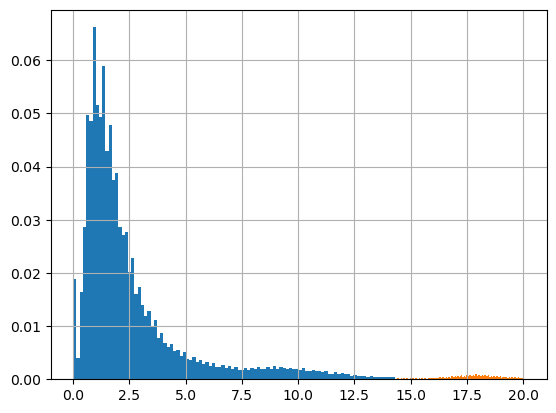

In [ ]:
# limit_95 = percentiles_df2.loc['95%']
# limit_99 = percentiles_df2.loc['99%']
# df2_95 = df_2.trip_distance[df_2.trip_distance <= limit_95]
# df2_5 = df_2.trip_distance[(df_2.trip_distance > limit_95) & (df_2.trip_distance<limit_99)]
# df2_95.hist(bins=100, weights=np.ones(len(df2_95))/len(df_2))
# # plt.show()
# df2_5.hist(bins=100, weights=np.ones(len(df2_5))/len(df_2))
# # plt.xscale('log')

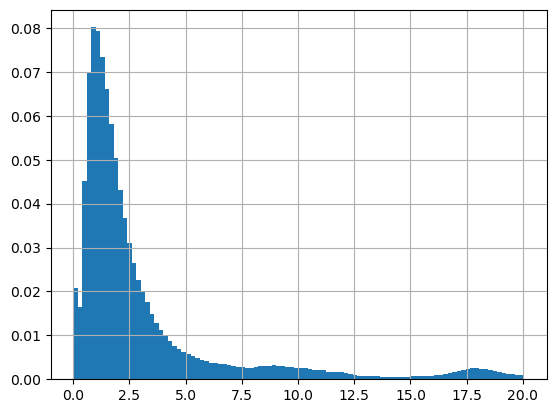

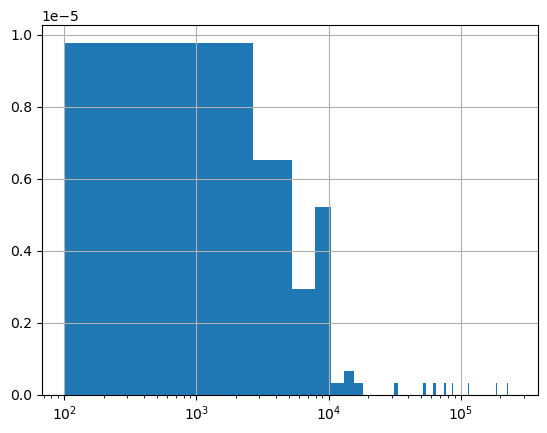

In [ ]:
limit_99 = percentiles_df2.loc['99%']
df2_99 = df_2.trip_distance[df_2.trip_distance <= limit_99]
df_tail  = df_2.trip_distance[(df_2.trip_distance > 100)]

# df2_5 = df_2.trip_distance[(df_2.trip_distance > limit_95) & (df_2.trip_distance<limit_99)]
df2_99.hist(bins=100, weights=np.ones(len(df2_99))/len(df_2))
plt.show()
df_tail.hist(bins=100, weights=np.ones(len(df_tail))/len(df_2))
plt.xscale('log')

0.8024

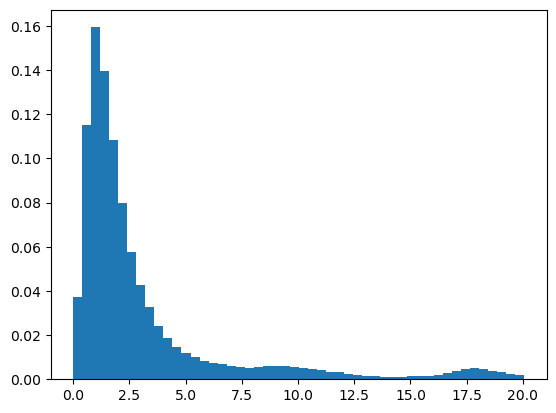

In [170]:
H=plt.hist(df2_99,bins=50, weights=np.ones(len(df2_99))/len(df_2))
#  df2_99.hist(bins=100, weights=np.ones(len(df2_99))/len(df_2))
ii = np.argmax(H[0])
H[1][ii]

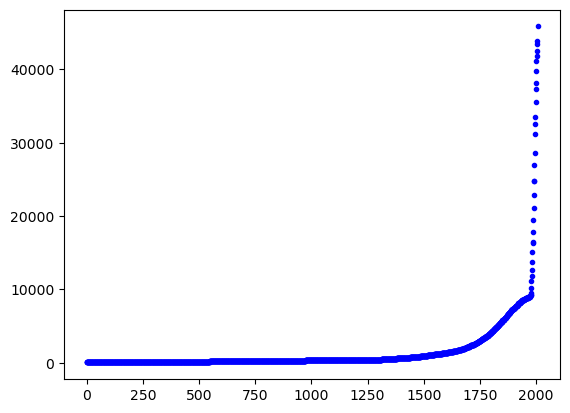

In [150]:
df_tripcounts  = pd.DataFrame(df2_99.value_counts().values, columns = ['counts'])
df_tripcounts['dist'] = df2_99.value_counts().index
df_tripcounts.sort_values(by='counts', inplace=True, ignore_index=True)
# display(df_tripcounts.tail(50))
x,y = df_tripcounts.dist, df_tripcounts.counts
plt.plot(y, 'b.')




(6000.0, 12000.0)

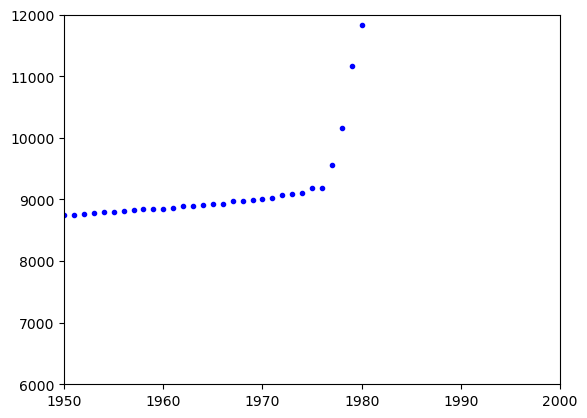

In [ ]:
plt.plot(y, 'b.')
plt.xlim(1950, 2000)
plt.ylim(6000, 12000)

(1950.0, 2007.0)

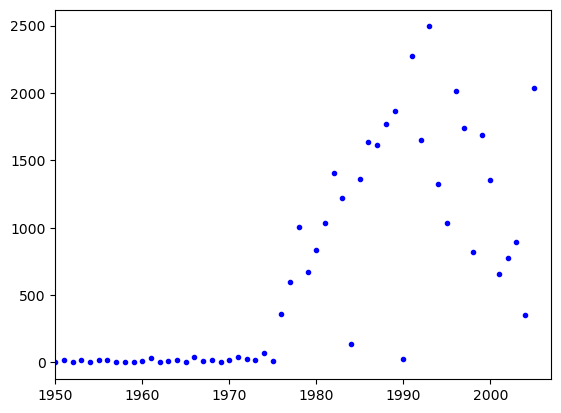

In [157]:
plt.plot(np.diff(y), 'b.')
plt.xlim(1950, len(y))
# plt.ylim(6000, 12000)

In [ ]:
df_tripcounts.iloc[1970:]

In [ ]:
display(df_tripcounts[df_tripcounts < 10000])
display(df_tripcounts[df_tripcounts > 10000])

This shows that the 95% of the  values of the `trip_distance` colmun fall between `0`and  `9.14` for the fisrt file (yellow taxis) and between `0` and `14.32` for the second file (green taxies). Additionally, there is a supsicious high number of trip  with 0 miles.  
The decision is to restrict the dataset to the 95%, considering the tail outliers, and to further restrict the trip length to a sensible distance (over 1 mile)   

## Encoding

In [175]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
# %%
from scipy.signal  import  find_peaks
import matplotlib.pyplot as plt
counts, bin_edges = np.histogram(DF.duration, bins=50)


peaks, _ = find_peaks(counts, height=0)  
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.hist(DF.duration, bins=50)
plt.plot(bin_centers[peaks], counts[peaks], "ro")  # mark peaks
plt.show()